In [33]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
import NB_funcs as hlp
import seaborn as sns

In [2]:
def pickle_save(filename, data):
    with open(filename,'wb') as _save:
        pickle.dump(data,_save)
    
def pickle_load(filename):
    with open(filename,'rb') as _load:
        var = pickle.load(_load)
    return var

def best_score(model, featureSet):
    model.equations_['feature_set'] = featureSet
    ind = model.equations_['score'].idxmax()
    df = model.equations_.iloc[ind]
    return df

# $\frac{dN}{dt*N} = r - \frac{rN}{K(x)}$

In [3]:
ACK_DF = pickle_load("../Data/Train_Test/ACK_PreprocessedData")
K = np.load('../Data/RawData/ACK/ACK_K.npy')
N_K = np.load('../Data/RawData/ACK/ACK_N_curves.npy')

# Feature Set 1: N

In [4]:
fs1 = pickle_load("../Data/ModelOutputs/ACK_FS1.pkl"); fs1E = best_score(fs1,1); fs1E['sympy_format']

0.43339476 - 5.865088e-8*Pop

In [5]:
fs1MB = fs1.get_best(); fs1MB['sympy_format']

0.53360605*exp(-3.6342803e-7*Pop)

In [6]:
fs1E["Features"] = r"$N$"; fs1MB["Features"] = r"$N$"

/run/nvme/job_17140036/tmp/ipykernel_1404446/1373657259.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fs1E["Features"] = r"$N$"; fs1MB["Features"] = r"$N$"
/run/nvme/job_17140036/tmp/ipykernel_1404446/1373657259.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fs1E["Features"] = r"$N$"; fs1MB["Features"] = r"$N$"
/run/nvme/job_17140036/tmp/ipykernel_1404446/1373657259.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fs1E["F

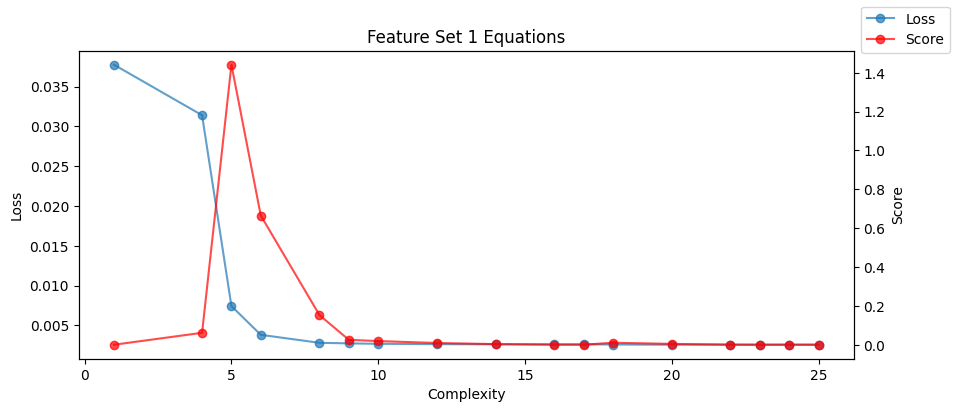

In [7]:
fig, ax = plt.subplots(figsize = (10,4))
ax.plot(fs1.equations_['complexity'],fs1.equations_['loss'],'-o',alpha=0.7, label = "Loss")
ax.set_title("Feature Set 1 Equations")
axT = ax.twinx()
axT.plot(fs1.equations_['complexity'],fs1.equations_['score'],'-o',c='r',alpha=0.7, label = "Score")
fig.legend()
ax.set_xlabel("Complexity"); ax.set_ylabel("Loss"); axT.set_ylabel("Score")
fig.tight_layout; plt.show()

# Feature Set 2: N, Ring

In [8]:
fs2 = pickle_load("../Data/ModelOutputs/ACK_FS2.pkl"); fs2E = best_score(fs2,2); fs2E['sympy_format']

4.8948214e-9*Pop*(-Ring - 8.991719) + 0.49061346

In [9]:
fs2MB = fs2.get_best(); fs2MB['sympy_format']

(4.8892845e-9*Pop*(-Ring - 8.9959568114) + 0.48880643)/(-4.8903717e-9*Pop*(0.09946975*Ring + 0.86623037) + 1.0018415)

In [10]:
fs2E["Features"] = r"$N,Ring$"; fs2MB["Features"] = r"$N,Ring$"

/run/nvme/job_17140036/tmp/ipykernel_1404446/2321442145.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fs2E["Features"] = r"$N,Ring$"; fs2MB["Features"] = r"$N,Ring$"
/run/nvme/job_17140036/tmp/ipykernel_1404446/2321442145.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fs2E["Features"] = r"$N,Ring$"; fs2MB["Features"] = r"$N,Ring$"
/run/nvme/job_17140036/tmp/ipykernel_1404446/2321442145.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

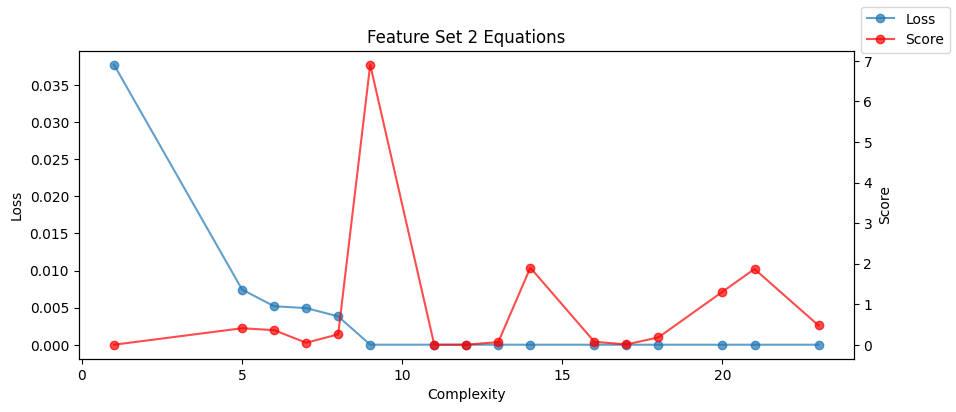

In [11]:
fig, ax = plt.subplots(figsize = (10,4))
ax.plot(fs2.equations_['complexity'],fs2.equations_['loss'],'-o',alpha=0.7, label = "Loss")
ax.set_title("Feature Set 2 Equations")
axT = ax.twinx()
axT.plot(fs2.equations_['complexity'],fs2.equations_['score'],'-o',c='r',alpha=0.7, label = "Score")
fig.legend()
ax.set_xlabel("Complexity"); ax.set_ylabel("Loss"); axT.set_ylabel("Score")
fig.tight_layout; plt.show()

# Feature Set 3: N, N_0

In [12]:
fs3 = pickle_load("../Data/ModelOutputs/ACK_FS3.pkl"); fs3E = best_score(fs3,3); fs3E['sympy_format']

0.433396 - 5.865157e-8*Pop

In [13]:
fs3MB = fs3.get_best(); fs3MB['sympy_format'] # Model Best

5.2522855/(1.28824066890929e-5*N_init*exp(9.1772853905334e-7*Pop) + 10.308208)

In [14]:
fs3E["Features"] = r"$N$"; fs3MB["Features"] = r"$N,N_0$"

/run/nvme/job_17140036/tmp/ipykernel_1404446/3879252698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fs3E["Features"] = r"$N$"; fs3MB["Features"] = r"$N,N_0$"
/run/nvme/job_17140036/tmp/ipykernel_1404446/3879252698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fs3E["Features"] = r"$N$"; fs3MB["Features"] = r"$N,N_0$"
/run/nvme/job_17140036/tmp/ipykernel_1404446/3879252698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

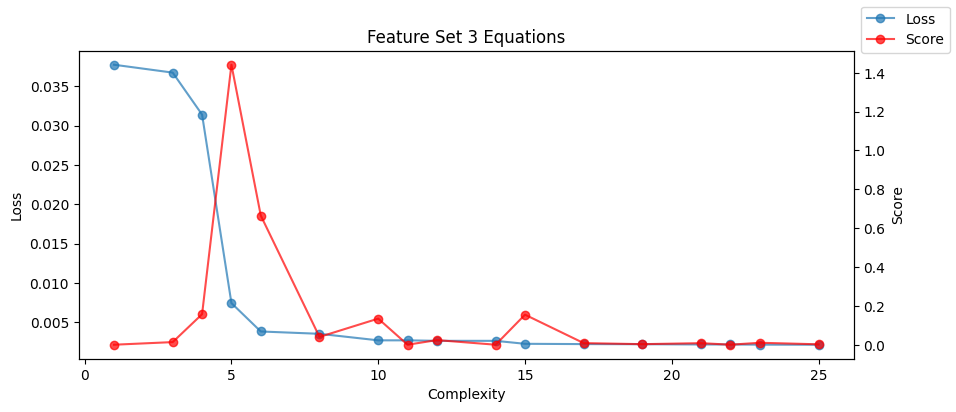

In [15]:
fig, ax = plt.subplots(figsize = (10,4))
ax.plot(fs3.equations_['complexity'],fs3.equations_['loss'],'-o',alpha=0.7, label = "Loss")
ax.set_title("Feature Set 3 Equations")
axT = ax.twinx()
axT.plot(fs3.equations_['complexity'],fs3.equations_['score'],'-o',c='r',alpha=0.7, label = "Score")
fig.legend()
ax.set_xlabel("Complexity"); ax.set_ylabel("Loss"); axT.set_ylabel("Score")
fig.tight_layout; plt.show()

# Feature Set 4: N, N_bar

In [16]:
fs4 = pickle_load("../Data/ModelOutputs/ACK_FS4.pkl"); fs4E = best_score(fs4,4); fs4E['sympy_format']

0.44443515 - 6.480566e-8*Nbar

In [17]:
fs4MB = fs4.get_best(); fs4MB['sympy_format']

2.9564638/(exp(7.671794e-7*Nbar) + 5.0171814)

In [18]:
fs4E["Features"] = r"$\bar{N}$"; fs4MB["Features"] = r"$\bar{N}$"

/run/nvme/job_17140036/tmp/ipykernel_1404446/1680282219.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fs4E["Features"] = r"$\bar{N}$"; fs4MB["Features"] = r"$\bar{N}$"
/run/nvme/job_17140036/tmp/ipykernel_1404446/1680282219.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fs4E["Features"] = r"$\bar{N}$"; fs4MB["Features"] = r"$\bar{N}$"
/run/nvme/job_17140036/tmp/ipykernel_1404446/1680282219.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

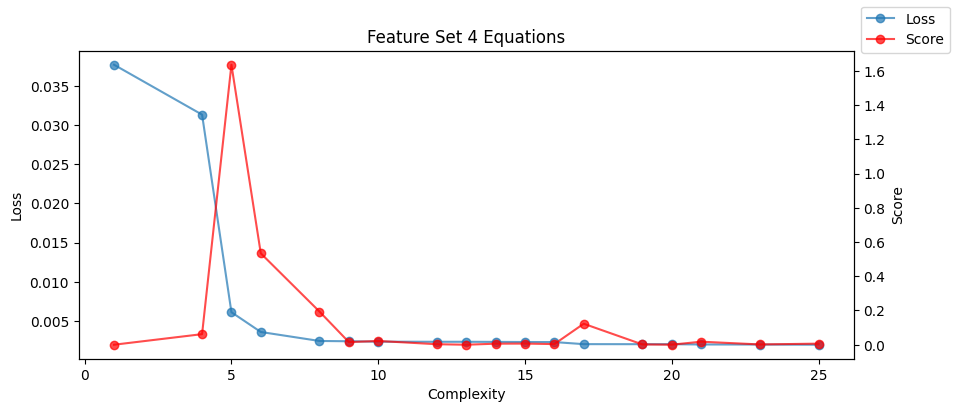

In [19]:
fig, ax = plt.subplots(figsize = (10,4))
ax.plot(fs4.equations_['complexity'],fs4.equations_['loss'],'-o',alpha=0.7, label = "Loss")
ax.set_title("Feature Set 4 Equations")
axT = ax.twinx()
axT.plot(fs4.equations_['complexity'],fs4.equations_['score'],'-o',c='r',alpha=0.7, label = "Score")
fig.legend()
ax.set_xlabel("Complexity"); ax.set_ylabel("Loss"); axT.set_ylabel("Score")
fig.tight_layout; plt.show()

# Feature Set 5: N, Ring, N_bar

In [20]:
fs5 = pickle_load("../Data/ModelOutputs/ACK_FS5.pkl"); fs5E = best_score(fs5,5); fs5E['sympy_format']

Pop*(-4.8944457e-9*Ring - 4.40137777184829e-8) + 0.4906053

In [21]:
fs5MB = fs5.get_best(); fs5MB['sympy_format']

(4.8746585e-9*Pop*(-0.99879505364728*Ring - 8.97527) + 0.48646978)/(5.1183644028916e-10*Pop*(-Ring - 8.016122) + 0.99708873)

In [22]:
fs5E["Features"] = r"$N,Ring$"; fs5MB["Features"] = r"$N,Ring$"

/run/nvme/job_17140036/tmp/ipykernel_1404446/4237172454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fs5E["Features"] = r"$N,Ring$"; fs5MB["Features"] = r"$N,Ring$"
/run/nvme/job_17140036/tmp/ipykernel_1404446/4237172454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fs5E["Features"] = r"$N,Ring$"; fs5MB["Features"] = r"$N,Ring$"
/run/nvme/job_17140036/tmp/ipykernel_1404446/4237172454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

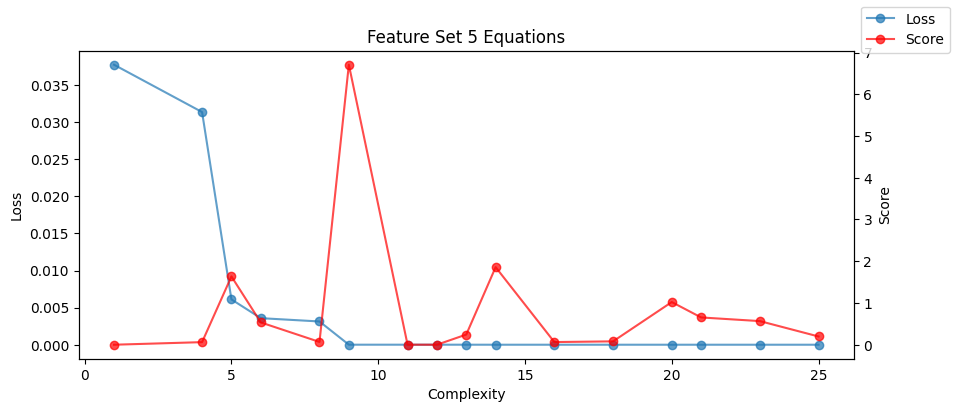

In [23]:
fig, ax = plt.subplots(figsize = (10,4))
ax.plot(fs5.equations_['complexity'],fs5.equations_['loss'],'-o',alpha=0.7, label = "Loss")
ax.set_title("Feature Set 5 Equations")
axT = ax.twinx()
axT.plot(fs5.equations_['complexity'],fs5.equations_['score'],'-o',c='r',alpha=0.7, label = "Score")
fig.legend()
ax.set_xlabel("Complexity"); ax.set_ylabel("Loss"); axT.set_ylabel("Score")
fig.tight_layout; plt.show()

# All Features Used

In [24]:
fsTD = pickle_load("../Data/ModelOutputs/ACK_TD.pkl"); fsTDE = best_score(fsTD,100); fsTDE['sympy_format']

0.484732948015881*exp(-7.391316e-8*Cum_N)

In [25]:
fsTDMB = fsTD.get_best(); fsTDMB['sympy_format']

0.002328437 + 1.3728335/(exp(0.669547820210073*Cum_N/Pop)*exp(1.34262077830518*N_init/Pop) - 1.2439653)

In [26]:
fsTDE["Features"] = r"$N,Ring$"; fsTDMB["Features"] = r"$N,N_C,Ring$"

/run/nvme/job_17140036/tmp/ipykernel_1404446/144585299.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fsTDE["Features"] = r"$N,Ring$"; fsTDMB["Features"] = r"$N,N_C,Ring$"
/run/nvme/job_17140036/tmp/ipykernel_1404446/144585299.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fsTDE["Features"] = r"$N,Ring$"; fsTDMB["Features"] = r"$N,N_C,Ring$"
/run/nvme/job_17140036/tmp/ipykernel_1404446/144585299.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

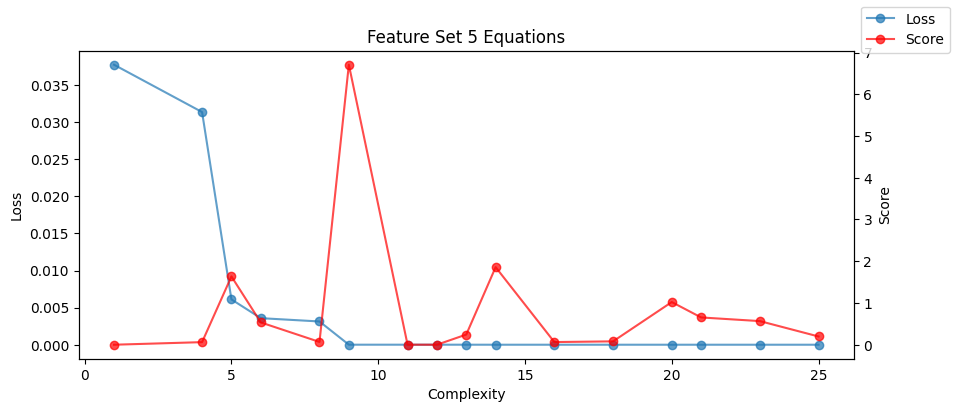

In [27]:
fig, ax = plt.subplots(figsize = (10,4))
ax.plot(fs5.equations_['complexity'],fs5.equations_['loss'],'-o',alpha=0.7, label = "Loss")
ax.set_title("Feature Set 5 Equations")
axT = ax.twinx()
axT.plot(fs5.equations_['complexity'],fs5.equations_['score'],'-o',c='r',alpha=0.7, label = "Score")
fig.legend()
ax.set_xlabel("Complexity"); ax.set_ylabel("Loss"); axT.set_ylabel("Score")
fig.tight_layout; plt.show()

# Model Comparison

In [53]:
def Null_Model_Errors(true,mean):
    errs = np.zeros(true.shape)
    for i in range(true.shape[1]):
        for j in range(true.shape[2]):
            errs[:,i,j] = np.sqrt(np.square(mean-true[:,i,j]))
    return errs

In [41]:
def get_errors(true, preds, agg="None"):
    rows,cols,points = true.shape[0],true.shape[1],true.shape[2]
    rmse = np.sqrt(np.square(preds-true))
    if agg=="None": return rmse
    if agg=="Time": return rmse.mean(axis=(1,2))
    if agg=="Space": return rmse.mean(axis=0)
    else: return "Invalid Agg"

In [42]:
def predict(equation,dataframes):
    rows = len(dataframes); cols = len(dataframes[0]); points = len(dataframes[0][0])
    preds = np.zeros((points,rows,cols))
    for i in range(rows):
        for df in dataframes[i]:
            ii = int(df['i'][0]); jj = int(df['j'][0])
            preds[:,ii,jj] = np.array(df.eval(equation))
    return preds

In [43]:
N_K = N_K[:,:250,:,:]; time = np.arange(N_K.shape[1]) * 0.1
dNdt = hlp.cubic_splines(N_K[1],time); dNovN = dNdt / N_K[1]
true = dNovN
mean = np.mean(dNovN,axis=(1,2))

In [57]:
model_list = [fs1MB,fs1E,fs2MB,fs2E,fs3MB,fs3E,fs4MB,fs4E,fs5MB,fs5E,fsTDMB,fsTDE]

model_errors = {"MB1":[0],"BS1":[1],"MB2":[2],"BS2":[3],"MB3":[4],"BS3":[5],
                             "MB4":[6],"BS4":[7],"MB5":[8],"BS5":[9],"MBTD":[10],"BSTD":[11]}

for model in model_errors:
    preds = predict(model_list[model_errors[model][0]]['equation'],ACK_DF[0][1])
    model_errors[model].append(get_errors(true,preds,agg="Space"))

null_error = Null_Model_Errors(true,mean).mean(axis=0)

In [46]:
BSEQs = pd.concat([fs1E,fs2E,fs3E,fs4E,fs5E,fsTDE],axis=1).T; BSEQs.reset_index(drop=True, inplace= True)
MBEQs = pd.concat([fs1MB,fs2MB,fs3MB,fs4MB,fs5MB,fsTDMB],axis=1).T; 
MBEQs.reset_index(drop=True, inplace= True)
BSEQs["Type"] = "Best Score"
MBEQs["Type"] = "Model Best"
BEQs = pd.concat([BSEQs,MBEQs],axis=0); BEQs.reset_index(drop=True, inplace=True)

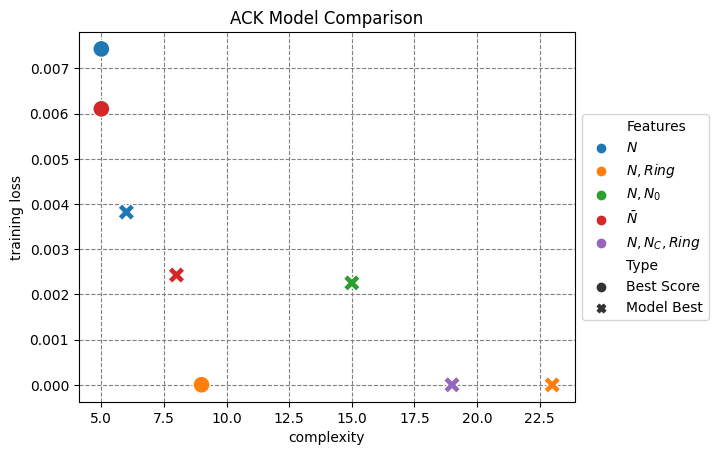

In [49]:
fig, ax = plt.subplots()
inds = [0,6,1,7,8,3,9,11]
BEQSP = BEQs.iloc[inds]
sns.scatterplot(data=BEQSP, x='complexity', y='loss', hue='Features', style='Type',s=150, ax=ax)
sns.move_legend(ax, bbox_to_anchor=(1, 0.5), loc='center left')
ax.set_ylabel("training loss")
ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')
ax.set_title("ACK Model Comparison")
plt.show()

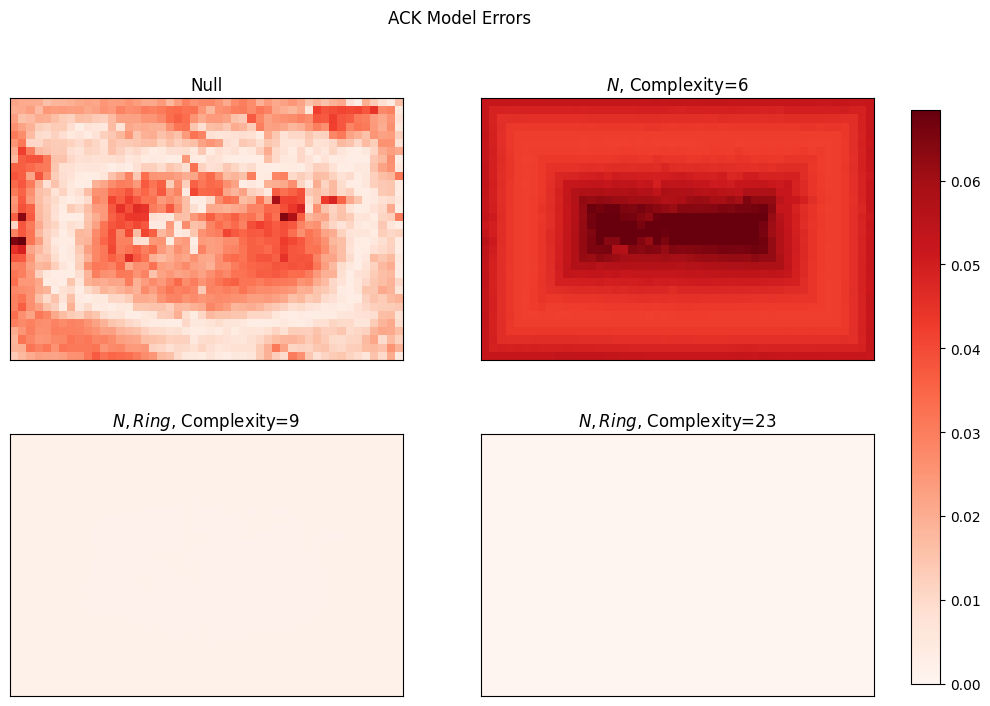

In [66]:
fig, axs = plt.subplots(2,2,figsize=(12,8))

cmax = np.max(null_error)

p1 = axs[0,0].imshow(null_error, cmap = 'Reds', vmin=0,vmax=cmax); axs[0,0].set_title(r"Null")
p2 = axs[0,1].imshow(model_errors['MB1'][1], cmap = 'Reds', vmin=0,vmax=cmax); axs[0,1].set_title(r"$N$, Complexity=6")
p3 = axs[1,0].imshow(model_errors['BS2'][1], cmap = 'Reds', vmin=0,vmax=cmax); axs[1,0].set_title(r"$N,Ring$, Complexity=9")
p3 = axs[1,1].imshow(model_errors['MB2'][1], cmap = 'Reds', vmin=0,vmax=cmax); axs[1,1].set_title(r"$N,Ring$, Complexity=23")

for ax in axs.ravel():
    ax.set_xticks([]);ax.set_yticks([])
    
fig.colorbar(p1,ax=axs,fraction=0.046*.67, pad=0.04)
fig.suptitle("ACK Model Errors")
plt.show()

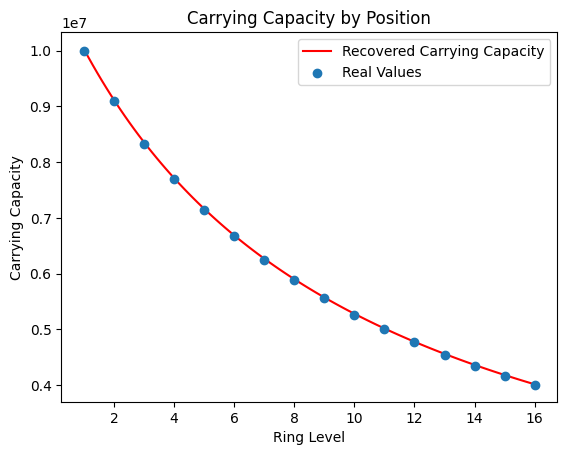

In [47]:
def KofX(x):
    return np.reciprocal(9.97694070602955e-09*(x+8.991719))
X = np.linspace(1,16,100)
Ks = np.zeros(16)
for i in range(1,17):
    Ks[i-1] = K[i-1,i-1]
fig, axs = plt.subplots()
axs.plot(X,KofX(X),c="red",label="Recovered Carrying Capacity")
axs.scatter(np.arange(1,17),Ks,label="Real Values",zorder=2)
axs.set_xlabel("Ring Level"); axs.set_ylabel("Carrying Capacity")
axs.set_title("Carrying Capacity by Position")
axs.legend()
plt.show()